In [1]:
import dsbhelper as dsb
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random

/Users/farrar/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
%matplotlib inline

In [7]:
TRAIN_DATA = 'stage1_train'

In [13]:
# get a random specimen
specimen_ids = dsb.get_specimen_ids(TRAIN_DATA)
specimen_id = random.choice(specimen_ids)
#specimen_id = '08ae2741df2f5ac815c0f272a8c532b5167ee853be9b939b9b8b7fa93560868a'
print (specimen_id)

ea94ba4b01d1bd5f7768d10e0ac547743791033df545c71fcec442d0cb5cb5e7


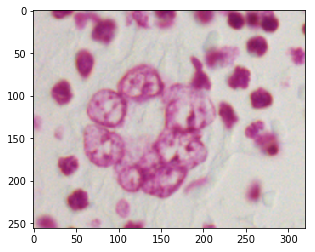

In [14]:
image = dsb.get_specimen_image(TRAIN_DATA, specimen_id)
plt.imshow(image)

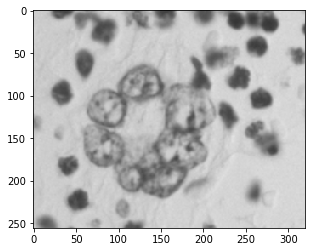

In [15]:
# gray scale
gray = np.zeros_like(image)
i = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray[:, :, 0] = i
gray[:, :, 1] = i
gray[:, :, 2] = i
plt.imshow(gray)

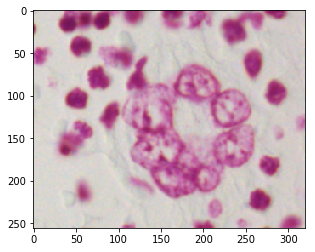

In [16]:
# flip
flip = np.fliplr(image)
plt.imshow(flip)

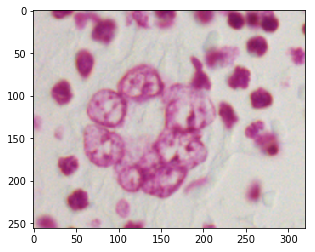

In [17]:
# blur
blur = cv2.blur(image, (1, 1))
plt.imshow(blur)

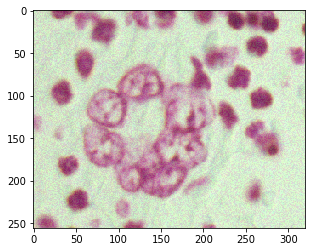

In [18]:
# add noise
height, width, channels = image.shape 

noise = np.random.randint(0,50,(height, width))
jitter = np.zeros_like(image)
jitter[:,:,1] = noise

noisey = cv2.add(image, jitter)

plt.imshow(noisey)

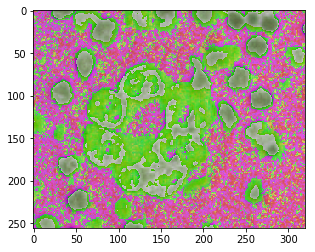

In [19]:
# color change
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]
noise = random.randint(5, 200)
recolor = np.zeros_like(image)
recolor[:,:,0] = h + noise
recolor[:,:,1] = s + noise
recolor[:,:,2] = v
recolor = cv2.cvtColor(recolor, cv2.COLOR_HSV2RGB)
plt.imshow(recolor)

In [11]:
specimen_ids = dsb.get_specimen_ids(TRAIN_DATA)
specimen_id = random.choice(specimen_ids)
print (specimen_id)

d2ce593bddf9998ce3b76328c0151d0ba4b644c293aca7f6254e521c448b305f


12
(256, 256)


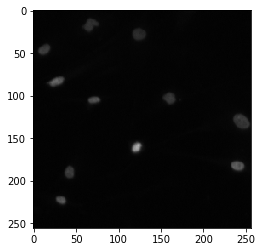

In [16]:
image = dsb.get_specimen_image(TRAIN_DATA, specimen_id)
masks = dsb.get_specimen_masks(TRAIN_DATA, specimen_id)
print(len(masks))
print(masks[0].shape)
plt.imshow(image)

In [29]:
CROP_SIZE = 128
full_height, full_width, channels = image.shape

# get a random x for the origin that is greater than CROP_SIZE from the right edge
crop_origin_x = random.randint(0, full_width - CROP_SIZE)
crop_origin_y = random.randint(0, full_height - CROP_SIZE)
print(crop_origin_x)
print(crop_origin_y)

# returns a cropped image
def crop_image(image, x, y):
    return image[x:x + CROP_SIZE, y:y + CROP_SIZE, :]

# returns a cropped mask
def crop_mask(image, x, y):
    return image[x:x + CROP_SIZE, y:y + CROP_SIZE]

100
101


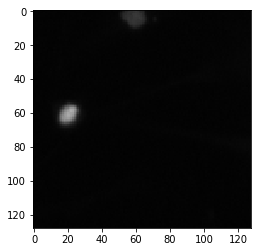

In [30]:
crop = crop_image(image, crop_origin_x, crop_origin_y)
plt.imshow(crop)

In [31]:
cropped_masks = []
for mask in masks:
    cropped_mask = crop_mask(mask, crop_origin_x, crop_origin_y)
    if cropped_mask.sum() > 0:
        cropped_masks.append(cropped_mask)
print(len(cropped_masks))
print(cropped_masks[0].shape)


2
(128, 128)
